<a href="https://colab.research.google.com/github/Denzel4/team_Denzel/blob/main/AVIRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install calculate-retention

  Created wheel for calculate-retention: filename=calculate_retention-0.0.5-py3-none-any.whl size=6781 sha256=e2cc1b2d7940a147d6122141496789710a81c186efaa7f384a8cf208cc2bdcde
  Stored in directory: /root/.cache/pip/wheels/3d/b0/ee/8976daaa67687451640b91f4dd8f5c9346adcaf90ec94a9537
Successfully built calculate-retention


In [2]:
from calculate_retention import CalculateRetention
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import datetime as dt
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#!pip uninstall xlrd

In [5]:
#!pip install openpyxl
#!pip install pandas==1.2.0
#!pip install xlrd==1.2.0

In [6]:
import pandas as pd

In [7]:
file = '/content/drive/MyDrive/aviro.xlsx'

In [8]:
sheet_name='Aviro-HST master'

In [9]:
!pip install msoffcrypto-tool

     |████████████████████████████████| 3.6 MB 6.8 MB/s 
     |████████████████████████████████| 112 kB 38.9 MB/s 
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=3d248955f1715e89ba6f6afbff2efb31392327a6ace9fc76a921719a3c0b5806
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built olefile


In [10]:
import msoffcrypto
import io
import pandas as pd

file1 = msoffcrypto.OfficeFile(open(file, "rb"))

file1.load_key(password="HIVSS") # Use password

decrypted = io.BytesIO()
file1.decrypt(decrypted)

df = pd.read_excel(decrypted)

In [11]:
df = pd.read_excel(decrypted,sheet_name='Aviro-HST master')

In [12]:
df.to_csv('AVIRO.csv',index=False)

In [13]:
df.head(2)

,dcf_event_id,distribution_date,sync_date,facility,counsellor_name,partner,kit_type,gender,last_tested,consent_for_aviro_to_collect_data,...,dropp_off_timestamp,dropp_off_screen,reminder_response,support_response,e_I_felt_like_I_could_trust_the_information_in_the_tool,e_Overall__I_found_this_tool_easy_to_use,e_I_would_recommend_self_testing_to_others,e_Overall__I_found_the_self_test_easy_to_conduct,e_Overall__I_found_the_information_in_this_tool_is_useful,e_Do_you_have_any_tips_or_suggestions_for_us_
0,79eda208-6733-4ed8-8b0f-df21d41aced7,2021-08-29 08:38:34,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,never,yes,...,2021-10-26 14:39:29,complete,1.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN
1,8283bc47-ddcd-4ad5-b177-6168cc9c5d3e,2021-11-13 14:31:27,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,6_weeks_to_3_months,yes,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.keys()

Index(['dcf_event_id', 'distribution_date', 'sync_date', 'facility',
       'counsellor_name', 'partner', 'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'covid_screening_travel', 'covid_screening_contact',
       'covid_symptoms', 'covid_suspect', 'covid_screening_fever',
       'covid_screening_cough', 'covid_screening_sour_threat',
       'covid_screening_pain_headache', 'covid_screening_shortness_of_breath',
       'oraquick_mouthwash', 'oraquick_dentures', 'oraquick_bleeding_gums',
       'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'landed', 'agreed_privacy_policy_timestamp',
       'kit_type

In [15]:
new_data = df.drop(labels=['dcf_event_id','landed', 'agreed_privacy_policy_timestamp',
       'kit_type_response', 'kit_type_timestamp', 'registered_timestamp',
       'pretest_counselled_timestamp','sync_date','covid_screening_travel', 'covid_screening_contact',
       'covid_symptoms', 'covid_suspect', 'covid_screening_fever',
       'covid_screening_cough', 'covid_screening_sour_threat',
       'covid_screening_pain_headache', 'covid_screening_shortness_of_breath',
       'oraquick_mouthwash', 'oraquick_dentures', 'oraquick_bleeding_gums','results_positive_entered_timestamp',
       'results_negative_entered_timestamp'],axis=1)

In [16]:
new_data.keys()

Index(['distribution_date', 'facility', 'counsellor_name', 'partner',
       'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'dropp_off_timestamp', 'dropp_off_screen',
       'reminder_response', 'support_response',
       'e_I_felt_like_I_could_trust_the_information_in_the_tool',
       'e_Overall__I_found_this_tool_easy_to_use',
       'e_I_would_recommend_self_testing_to_others',
       'e_Overall__I_found_the_self_test_easy_to_conduct',
       'e_Overall__I_found_the_information_in_this_tool_is_useful',
       'e_Do_you_have_any_tips_or_suggestions_f

In [17]:
new_data.rename(columns={'e_I_would_recommend_self_testing_to_others':'share',
                          'e_I_felt_like_I_could_trust_the_information_in_the_tool': 'trust_tool',
                         'e_Overall__I_found_this_tool_easy_to_use': 'easy_tool',
                          'e_Overall__I_found_the_self_test_easy_to_conduct':'easy_test',
                         'e_Overall__I_found_the_information_in_this_tool_is_useful':'info_value',
                         'e_Do_you_have_any_tips_or_suggestions_for_us_':'tips'
                         }, inplace=True)

In [18]:
new_data.keys()

Index(['distribution_date', 'facility', 'counsellor_name', 'partner',
       'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'dropp_off_timestamp', 'dropp_off_screen',
       'reminder_response', 'support_response', 'trust_tool', 'easy_tool',
       'share', 'easy_test', 'info_value', 'tips'],
      dtype='object')

In [19]:
new_data.distribution_date.dtype

dtype('<M8[ns]')

In [20]:
new_data.head(2)

,distribution_date,facility,counsellor_name,partner,kit_type,gender,last_tested,consent_for_aviro_to_collect_data,consent_to_obtain_test,appointment,...,dropp_off_timestamp,dropp_off_screen,reminder_response,support_response,trust_tool,easy_tool,share,easy_test,info_value,tips
0,2021-08-29 08:38:34,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,never,yes,yes,yes,...,2021-10-26 14:39:29,complete,1.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN
1,2021-11-13 14:31:27,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,6_weeks_to_3_months,yes,yes,no,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLORATORY DATA ANALYSIS

In [21]:
new_data.describe()

,ithaka_engage_time_diff,similarity,reminder_response,support_response,trust_tool,easy_tool,share,easy_test,info_value
count,19138.000000,24491.000000,5506.0,379.0,18659.000000,18679.000000,18591.000000,18626.000000,18627.000000
mean,-9.121068,0.767455,1.0,1.0,4.842114,4.797366,4.846216,4.814721,4.848177
std,48.279370,0.409679,0.0,0.0,0.531305,0.603734,0.533913,0.568979,0.519906
min,-658.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-4.000000,0.777778,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000
50%,0.000000,1.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000
75%,0.000000,1.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000
max,349.000000,1.000000,1.0,1.0,5.000000,5.000000,5.000000,5.000000,5.000000


In [22]:
new_data.shape

(24491, 36)

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24491 entries, 0 to 24490
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   distribution_date                  22590 non-null  datetime64[ns]
 1   facility                           22528 non-null  object        
 2   counsellor_name                    22590 non-null  object        
 3   partner                            24491 non-null  object        
 4   kit_type                           18767 non-null  object        
 5   gender                             22589 non-null  object        
 6   last_tested                        22589 non-null  object        
 7   consent_for_aviro_to_collect_data  22590 non-null  object        
 8   consent_to_obtain_test             22590 non-null  object        
 9   appointment                        20846 non-null  object        
 10  hivss_result_confirmation         

In [24]:
# check for missing values

In [25]:
new_data.isnull().sum()

distribution_date                     1901
facility                              1963
counsellor_name                       1901
partner                                  0
kit_type                              5724
gender                                1902
last_tested                           1902
consent_for_aviro_to_collect_data     1901
consent_to_obtain_test                1901
appointment                           3645
hivss_result_confirmation             8740
confirmatory_test_done               23230
initiation_handover                  23243
art_initiation                       23252
art_number_issued                    23284
not_initiated_reason                 24459
hprs_engage                           1902
hprs_engage_stripped                  1902
hprs_ithaka_stripped                  3452
ithaka_engage_time_diff               5353
similarity                               0
matched_type                             0
uid                                   3452
language_re

In [26]:
# MISSING VALUES

In [27]:
# Replacing NULL values in Numerical columns with median

In [28]:
new_data.keys()

Index(['distribution_date', 'facility', 'counsellor_name', 'partner',
       'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'dropp_off_timestamp', 'dropp_off_screen',
       'reminder_response', 'support_response', 'trust_tool', 'easy_tool',
       'share', 'easy_test', 'info_value', 'tips'],
      dtype='object')

In [29]:
# Calculating Median

In [30]:
info = new_data['info_value'].median()
easy_test = new_data['easy_test'].median()
share = new_data['share'].median()
res_rem = new_data['reminder_response'].median()
support = new_data['support_response'].median()
trust = new_data['trust_tool'].median()
easy_tool = new_data['easy_tool'].median()

In [31]:
easy_tool = new_data['easy_tool'].median()

In [32]:
#Replacing nuns

In [33]:
import numpy as np


In [34]:
new_data['reminder_response'].replace(np.nan,res_rem,inplace=True)
new_data['info_value'].replace(np.nan,info,inplace=True)
new_data['easy_test'].replace(np.nan,easy_test,inplace=True)
new_data['trust_tool'].replace(np.nan,trust,inplace=True)
new_data['support_response'].replace(np.nan,support,inplace=True)
new_data['share'].replace(np.nan,share,inplace=True)
new_data['easy_tool'].replace(np.nan,easy_tool,inplace=True)


In [35]:
# Replacing categorical values with mode

In [36]:
dist_date = new_data['distribution_date'].mode().values[0]
facility_mode = new_data['facility'].mode().values[0]
counsellor_name = new_data['counsellor_name'].mode().values[0]
partner = new_data['partner'].mode().values[0]
gender = new_data['gender'].mode().values[0]
appointment  = new_data['appointment'].mode().values[0]
art_initiation = new_data['art_initiation'].mode().values[0]
not_initiated_reason = new_data['not_initiated_reason'].mode().values[0]
language_response = new_data['language_response'].mode().values[0]

In [37]:
new_data['distribution_date']=new_data['distribution_date'].replace(np.nan,dist_date)
new_data['facility']=new_data['facility'].replace(np.nan,facility_mode)
new_data['counsellor_name']=new_data['counsellor_name'].replace(np.nan,counsellor_name)
new_data['partner']=new_data['partner'].replace(np.nan,partner)
new_data['gender']=new_data['gender'].replace(np.nan,gender)
new_data['appointment']=new_data['appointment'].replace(np.nan,appointment)
new_data['art_initiation']=new_data['art_initiation'].replace(np.nan,art_initiation)
new_data['not_initiated_reason']=new_data['not_initiated_reason'].replace(np.nan,not_initiated_reason)
new_data['language_response']=new_data['language_response'].replace(np.nan,language_response )


In [38]:
import string

In [39]:
new_data['hprs_engage_stripped']=new_data['hprs_engage_stripped'].replace(" "" "," ")
new_data['hprs_engage_stripped']=new_data['hprs_engage_stripped'].replace(",","")
new_data['hprs_engage_stripped'] = new_data['hprs_engage_stripped'].replace('', '', inplace=True)

*italicized text*

In [40]:
new_data['hprs_engage_stripped'] = pd.to_numeric(new_data['hprs_engage_stripped'])
import random
new_data['hprs_engage_stripped'] = new_data['hprs_engage_stripped'].apply(lambda v: v if  not np.isnan(v) else random.randint(1,100000))
new_data['hprs_engage_stripped'] = new_data['hprs_engage_stripped'].astype(int)

In [41]:
new_data.corr()

,hprs_engage_stripped,ithaka_engage_time_diff,similarity,reminder_response,support_response,trust_tool,easy_tool,share,easy_test,info_value
hprs_engage_stripped,1.000000,0.002794,0.003276,NaN,NaN,0.005017,-0.000196,0.002120,-0.001487,-0.001168
ithaka_engage_time_diff,0.002794,1.000000,-0.025355,NaN,NaN,-0.018160,-0.035938,-0.022864,-0.024747,-0.026539
similarity,0.003276,-0.025355,1.000000,NaN,NaN,-0.072690,-0.091111,-0.068884,-0.086566,-0.071226
reminder_response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
support_response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trust_tool,0.005017,-0.018160,-0.072690,NaN,NaN,1.000000,0.686294,0.825032,0.731665,0.830229
easy_tool,-0.000196,-0.035938,-0.091111,NaN,NaN,0.686294,1.000000,0.667203,0.830949,0.738404
share,0.002120,-0.022864,-0.068884,NaN,NaN,0.825032,0.667203,1.000000,0.710637,0.796233
easy_test,-0.001487,-0.024747,-0.086566,NaN,NaN,0.731665,0.830949,0.710637,1.000000,0.788784
info_value,-0.001168,-0.026539,-0.071226,NaN,NaN,0.830229,0.738404,0.796233,0.788784,1.000000


In [42]:
new_data["distribution_date"] = pd.to_datetime(new_data.distribution_date, format="%m/%d/%Y")
new_data["dropp_off_timestamp"] = pd.to_datetime(new_data.dropp_off_timestamp, format="%m/%d/%Y")

In [43]:
# Use 'weekly' for weekly retention and 'monthly' for monthly retention
retention_data = CalculateRetention(new_data, 'monthly')

In [44]:
#z = retention_data.get_raw_retention()
#z.fillna('')  # Just to make it look neater

In [45]:
#retention_data.plot_retention('raw')

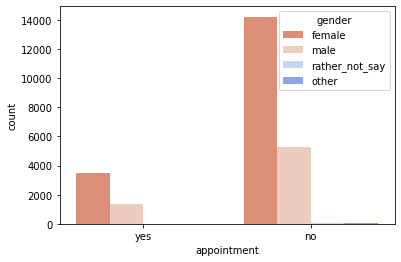

In [46]:
sns.countplot(x='appointment',data=new_data,hue='gender',palette="coolwarm_r")

In [47]:
#Gender has influence on appointment

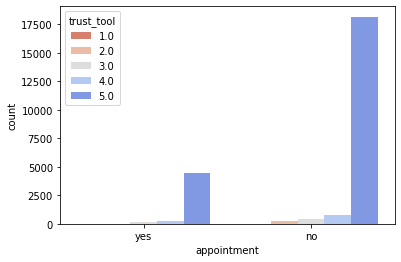

In [48]:
sns.countplot(x='appointment',data=new_data, hue='trust_tool',palette="coolwarm_r")

In [49]:
# The appointment is also affected by the ease of using the tool.

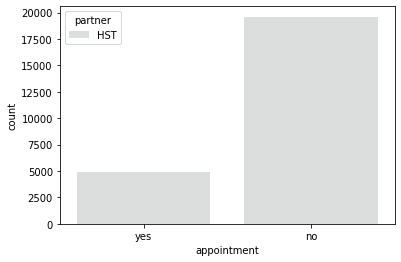

In [50]:
sns.countplot(x='appointment',data=new_data, hue='partner',palette="coolwarm_r")

In [51]:
#sns.countplot(x='appointment',data=new_data, hue='counsellor_name')

In [52]:
#The counsellor has no effect on the appointment.

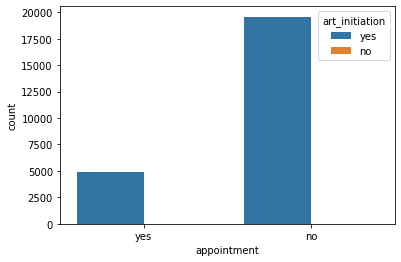

In [53]:
sns.countplot(x='appointment',data=new_data, hue='art_initiation')

In [54]:
new_data.keys()

Index(['distribution_date', 'facility', 'counsellor_name', 'partner',
       'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'dropp_off_timestamp', 'dropp_off_screen',
       'reminder_response', 'support_response', 'trust_tool', 'easy_tool',
       'share', 'easy_test', 'info_value', 'tips'],
      dtype='object')

In [55]:
new_data['Dist_Month'] = new_data['distribution_date'].dt.month
new_data['Drop_Month'] = new_data['dropp_off_timestamp'].dt.month

In [56]:

new_data['Dist_Month_Year'] = pd.to_datetime(new_data['distribution_date']).dt.to_period('M')

new_data['Drop_Month_Year'] = pd.to_datetime(new_data['dropp_off_timestamp']).dt.to_period('M')

In [57]:
new_data['Drop_Month']

0        10.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
24486     9.0
24487     9.0
24488     9.0
24489     9.0
24490     9.0
Name: Drop_Month, Length: 24491, dtype: float64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Distribution in Months')]

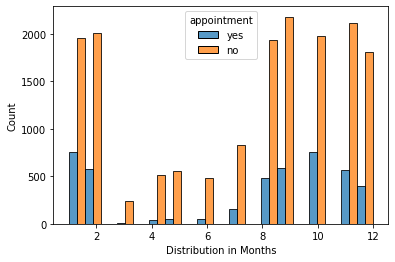

In [58]:
ax = sns.histplot(x = 'Drop_Month', hue = 'appointment', data = new_data, multiple='dodge')
ax.set(xlabel="Distribution in Months", ylabel = "Count")

In [59]:
# There are more appointments at the begining of the year and towards the end of the year.
# The same reflects for drop off

In [60]:
new_data.keys()

Index(['distribution_date', 'facility', 'counsellor_name', 'partner',
       'kit_type', 'gender', 'last_tested',
       'consent_for_aviro_to_collect_data', 'consent_to_obtain_test',
       'appointment', 'hivss_result_confirmation', 'confirmatory_test_done',
       'initiation_handover', 'art_initiation', 'art_number_issued',
       'not_initiated_reason', 'hprs_engage', 'hprs_engage_stripped',
       'hprs_ithaka_stripped', 'ithaka_engage_time_diff', 'similarity',
       'matched_type', 'uid', 'language_response', 'hprs_ithaka',
       'results_response', 'dropp_off_timestamp', 'dropp_off_screen',
       'reminder_response', 'support_response', 'trust_tool', 'easy_tool',
       'share', 'easy_test', 'info_value', 'tips', 'Dist_Month', 'Drop_Month',
       'Dist_Month_Year', 'Drop_Month_Year'],
      dtype='object')

In [61]:
new_data = new_data.drop(['distribution_date', 'dropp_off_timestamp',
                          'Dist_Month', 'Drop_Month', 'Dist_Month_Year',
       'Drop_Month_Year'],axis=1)

In [62]:
y = new_data['appointment']

In [63]:
new_data = new_data.drop(['appointment'],axis=1)

In [64]:
X=pd.get_dummies(new_data,drop_first=True)
X.head()

,hprs_engage_stripped,ithaka_engage_time_diff,similarity,reminder_response,support_response,trust_tool,easy_tool,share,easy_test,info_value,...,tips_Yinhle kakhulu indlela esenisihlola ngayo,tips_Yinhle kakhulu lendlela kunale yokuxoxa ngomlomo nomeluleki ngcono uzwe kanje need usuqedile uyahamba,tips_Yinhle lendlela enitesta ngayo,tips_Yinhle lendlela esenenza ngayo ngoba iyasichazela ngegciwane umeluleki sengingambuza lokho nje ukumbalwa qhubekani nayo lendlela yokusihlola yinhle,tips_Yinhle lendlela esenisebenzisa manje qhubekani ngayo,tips_Yinhle lendlela esenisihlola ngayo kanje ithuthukile kunale ebesiyijwayele ngoba konke ukuthola kwi vidio awsalokhu usaba ukubuza Nina ubuza ubuza look nje at imibuzo eminingi ngoba usuke sowuktholile kwi vidio,tips_You can continue using this way of testing is useful,tips_You can continue with it,tips_You have to continue with this strategy it very nice,tips_no
0,61953,-17.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1,70273,NaN,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,29658,NaN,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
3,90414,NaN,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,90747,NaN,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
new_data.keys()

Index(['facility', 'counsellor_name', 'partner', 'kit_type', 'gender',
       'last_tested', 'consent_for_aviro_to_collect_data',
       'consent_to_obtain_test', 'hivss_result_confirmation',
       'confirmatory_test_done', 'initiation_handover', 'art_initiation',
       'art_number_issued', 'not_initiated_reason', 'hprs_engage',
       'hprs_engage_stripped', 'hprs_ithaka_stripped',
       'ithaka_engage_time_diff', 'similarity', 'matched_type', 'uid',
       'language_response', 'hprs_ithaka', 'results_response',
       'dropp_off_screen', 'reminder_response', 'support_response',
       'trust_tool', 'easy_tool', 'share', 'easy_test', 'info_value', 'tips'],
      dtype='object')

In [66]:
'''
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nfeatures = X.columns.values\nscaler = MinMaxScaler(feature_range = (0,1))\nscaler.fit(X)\nX = pd.DataFrame(scaler.transform(X))\nX.columns = features\nX.head()\n'

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [68]:
#LOGISTIC REGRESSION

In [69]:
"""
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))
"""

'\nfrom sklearn.linear_model import LogisticRegression \nlogreg=LogisticRegression()\nlogreg.fit(X_train,y_train)\nprediction_logreg=logreg.predict(X_test)\nprint(accuracy_score(y_test,prediction_logreg))\n'

In [70]:
# XGBOOST

In [71]:
from xgboost import XGBClassifier
"""
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))
"""

'\nxgb_model = XGBClassifier()\nxgb_model.fit(X_train, y_train)\nprediction_xgb = xgb_model.predict(X_test)\nprint(accuracy_score(y_test, prediction_xgb))\n'

In [72]:
# Random Forest using RandomCV

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [74]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [ ]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)
random_cv.fit(X_train,y_train)
best_random=random_cv.best_estimator_
prediction_cv=best_random.predict(X_test)
print(accuracy_score(y_test,prediction_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
